In [ ]:
# Bibliotecas utilizadas

import numpy as np

In [ ]:
# Função para transformar a coordenada GMS para GD

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

In [ ]:
# Dados de Entrada

# Sistema Geodésico SAD-69
a=6378160 # Semi-eixo maior 
f=1/298.25 # Achatamento
e_2= 0.006694542

# Ponto P1 e P2
P1=[[25, 33, 06.9180,"S"],[49, 2, 11.4622,"W"]]
P2=[[25, 31, 11.1900,"S"],[49, 6, 27.1595,"W"]]

In [ ]:
# Convertendo de grau minuto segundo para grau decimal

latP1=dms2dd(P1[0][0], P1[0][1], P1[0][2], P1[0][3])
longP1=dms2dd(P1[1][0], P1[1][1], P1[1][2], P1[1][3])
latP2=dms2dd(P2[0][0], P2[0][1], P2[0][2], P2[0][3])
longP2=dms2dd(P2[1][0], P2[1][1], P2[1][2], P2[1][3])

In [ ]:
latP1

-25.55192166666667

In [ ]:
# Função para o cálculo da distância entre dois pontos pelo problema inverso

def probInverso(a,f,e_2,latP1,longP1,latP2,longP2):
    

SyntaxError: ignored

Latitude média

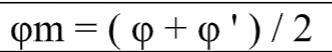

In [ ]:
mLat=((latP2+latP1)/2)
mLat

-25.535848333333334

Diferença entre as latitudes de P e P'

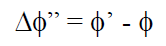

In [ ]:
dLat=latP2-latP1
dLat

0.03214666666666943

In [ ]:
dLat*3600

115.72800000000996

Diferença entre as latitudes em segundos

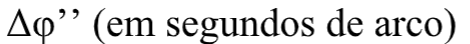

In [ ]:
# dlat em Segundos
dLatSeg=dLat*3600
dLatSeg


115.72800000000996

Diferença entre as longitudes

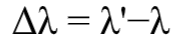

In [ ]:
dLong=longP2-longP1
dLong

-0.07102702777778092

Diferença entre as longitudes em segundos

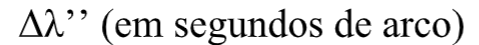

In [ ]:
# dLong em Segundos
dLongSeg=dLong*3600
dLongSeg

-255.6973000000113

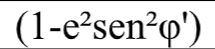

In [ ]:
round(1-e_2*(np.sin(np.radians(latP2))**2),10)

0.9987574388

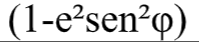

In [ ]:
round(1-e_2*(np.sin(np.radians(latP1))**2),10)

0.9987545168



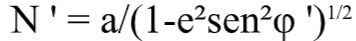

In [ ]:
N2=round(((a)/(np.sqrt((1-e_2*(np.sin(np.radians(latP2))**2))))),3)
N2

6382126.324

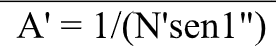

In [ ]:
A2=((1)/(N2*np.sin(np.radians(dms2dd(0, 0, 1, "N")))))
A2

0.03231913562604443

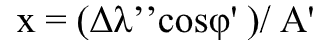

In [ ]:
x = round(((dLongSeg*np.cos(np.radians(latP2)))/(A2)),6)
x

-7139.752006

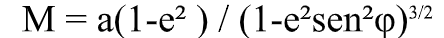

In [ ]:
M=((a*(1-e_2))/((1-e_2*(np.sin(np.radians(latP1))**2))**(3/2)))
M

6347315.659576881

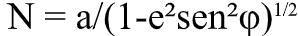

In [ ]:
N=((a)/((1-e_2*(np.sin(np.radians(latP1))**2))**(1/2)))
N

6382135.659702051

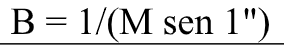

In [ ]:
B=((1)/(M*np.sin(np.radians(dms2dd(0, 0, 1, "N")))))
B

0.03249638387476293

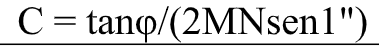

In [ ]:
C=((np.tan(np.sin(latP1)))/(2*M*N*np.sin(np.radians(dms2dd(0, 0, 1, "N")))))
C

-1.097489171489724e-09

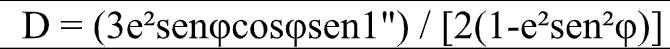

Onde: 

    D1 = (3e²senφcosφsen1") 
    D2 = [2(1-e²sen²φ)]

In [ ]:
D1=3*e_2*np.sin(np.radians(latP1))*np.cos(np.radians(latP1))*np.sin(np.radians(dms2dd(0, 0, 1, "N")))
D1

-3.789010487110854e-08

In [ ]:
D2=(2*(1-e_2*(np.sin(np.radians(latP1))**2)))
D2

1.997509033575012

In [ ]:
D=D1/D2
D

-1.89686776050746e-08

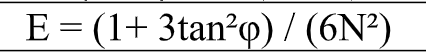

In [ ]:
E = ((1+3*(np.tan(np.radians(latP1))**2))/(6*N**2))
E

6.897606159619263e-15

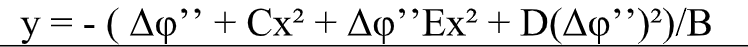

In [ ]:
y = (-1*((dLatSeg+C*x**2+dLatSeg*E*x**2+D*dLatSeg**2)/(B)))
y

-3559.52962083019

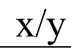

In [ ]:
x/y

2.005813342363701

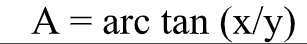

In [ ]:
A=np.arctan(x/y)
A

1.1083086884228028

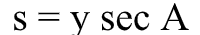

In [115]:
s = abs(y*(1/np.cos(A)))
s

7977.863738416979

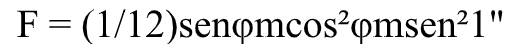

In [ ]:
F=(1/12)*np.sin(np.radians(mLat))*(np.cos(np.radians(mLat))**2)*(np.sin(np.radians(dms2dd(0, 0, 1, "N")))**2)
F

-6.874468712135461e-13

Cálculo da Convergência Meridiana

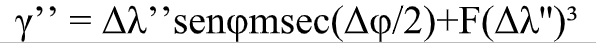

In [ ]:
gamaSeg=dLongSeg*np.sin(np.radians(mLat))*(1/np.cos(np.radians(dLat/2)))+F*dLongSeg**3
gamaSeg

110.22491719823529

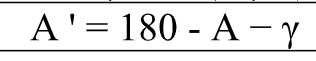

In [125]:
# Azimute em minutos
A2_2_P1P2=180-np.degrees(A)-(gamaSeg/60)
A2_2

114.66150780238972